#set up and imports
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout


In [343]:
#set up and imports 
import kagglehub 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency 
from sklearn.feature_selection import RFE 
from sklearn.ensemble import RandomForestClassifier 
from imblearn.pipeline import Pipeline # Use imblearn's Pipeline 
from imblearn.over_sampling import SMOTE 
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score 
from sklearn.feature_selection import SelectFromModel 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report 
from sklearn.linear_model import LogisticRegression 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import Input 
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import pointbiserialr
from scipy.stats import kruskal #non-parametric test


In [167]:
#Data Loading
# Download latest version
path = kagglehub.dataset_download("anthonytherrien/depression-dataset")
file_name="depression_data.csv"
full_path = os.path.join(path, file_name)
df = pd.read_csv(full_path)

In [169]:
#Column manipulation
df['Children'] = df['Number of Children'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [171]:
#missing data
missing_data_summary = df.isnull().sum()
print(missing_data_summary)
#No need for imputation methods

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Children                        0
dtype: int64


In [173]:
#Check for duplicates
duplicates = df.duplicated()
print(df[duplicates])
#No duplicated rows to manage

Empty DataFrame
Columns: [Name, Age, Marital Status, Education Level, Number of Children, Smoking Status, Physical Activity Level, Employment Status, Income, Alcohol Consumption, Dietary Habits, Sleep Patterns, History of Mental Illness, History of Substance Abuse, Family History of Depression, Chronic Medical Conditions, Children]
Index: []


In [175]:
#Train-Test Split
# Specify the target column
target_column = 'History of Mental Illness'
categorical_cols=['Marital Status', "Education Level", "Smoking Status", 'Physical Activity Level', 'Employment Status', 
                  'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', #'History of Mental Illness',
                  'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions','Children']
continuous_cols = ['Age', 'Number of Children', 'Income'] 

columns_to_keep = categorical_cols + continuous_cols

# Split the DataFrame into features and target
X = df[columns_to_keep]
y = df[target_column]

from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Validation split
X_train_noval, X_val, y_train_noval, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
##Exploratory Analysis

In [259]:
# X_train.head(10)
# X_train.describe()
# X_train.columns

,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Children,Age,Number of Children,Income,target
166515,Divorced,High School,Non-smoker,Moderate,Employed,Moderate,Unhealthy,Good,No,No,No,No,57,0,27058.50,No
1901,Single,High School,Current,Sedentary,Unemployed,Low,Moderate,Good,No,No,Yes,No,20,0,4655.70,No
191290,Divorced,Associate Degree,Non-smoker,Active,Unemployed,Low,Unhealthy,Fair,No,No,Yes,Yes,52,1,29287.41,No
12726,Married,Bachelor's Degree,Non-smoker,Moderate,Unemployed,High,Healthy,Fair,Yes,Yes,No,Yes,68,3,21187.99,No
56881,Married,Master's Degree,Former,Sedentary,Unemployed,Moderate,Moderate,Fair,No,Yes,No,Yes,78,1,22961.79,Yes
155612,Widowed,Master's Degree,Non-smoker,Sedentary,Employed,Moderate,Unhealthy,Fair,No,No,No,Yes,76,1,89618.93,Yes
188254,Married,Master's Degree,Current,Sedentary,Unemployed,Moderate,Unhealthy,Poor,Yes,No,Yes,No,41,0,13423.03,No
180938,Widowed,Bachelor's Degree,Former,Sedentary,Employed,Low,Moderate,Good,Yes,No,Yes,Yes,73,2,71738.45,Yes
391954,Married,Bachelor's Degree,Non-smoker,Active,Unemployed,High,Moderate,Good,Yes,No,Yes,No,45,0,13462.67,No
236570,Widowed,Associate Degree,Former,Sedentary,Unemployed,High,Unhealthy,Fair,Yes,No,No,No,53,0,11837.60,Yes


In [179]:
# List of groups

for i in categorical_cols:
    unique_groups_list = X_train[i].unique().tolist()
    group_counts = X_train[i].value_counts()
    print(i, "unique groups:", group_counts)

Marital Status unique groups: Marital Status
Married     192267
Single       57659
Widowed      54810
Divorced     26278
Name: count, dtype: int64
Education Level unique groups: Education Level
Bachelor's Degree    99397
High School          95137
Associate Degree     64075
Master's Degree      58998
PhD                  13407
Name: count, dtype: int64
Smoking Status unique groups: Smoking Status
Non-smoker    197827
Former         93122
Current        40065
Name: count, dtype: int64
Physical Activity Level unique groups: Physical Activity Level
Sedentary    141362
Moderate     126503
Active        63149
Name: count, dtype: int64
Employment Status unique groups: Employment Status
Employed      212490
Unemployed    118524
Name: count, dtype: int64
Alcohol Consumption unique groups: Alcohol Consumption
Moderate    138804
Low         111422
High         80788
Name: count, dtype: int64
Dietary Habits unique groups: Dietary Habits
Unhealthy    136880
Moderate     136188
Healthy       57946


In [181]:
#Target variable categories
unique_groups_list = y_train.unique().tolist()
group_counts = y_train.value_counts()
print(i, "unique groups:", group_counts)

#Group imbalance to investigate

Children unique groups: History of Mental Illness
No     230472
Yes    100542
Name: count, dtype: int64


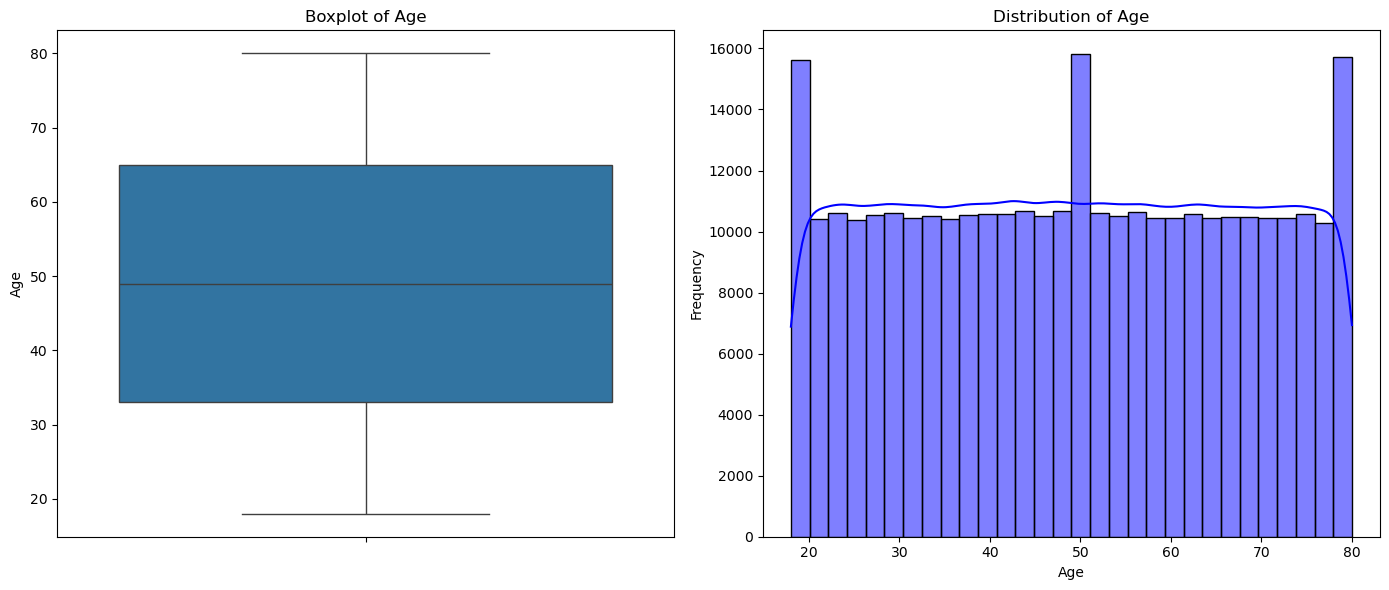

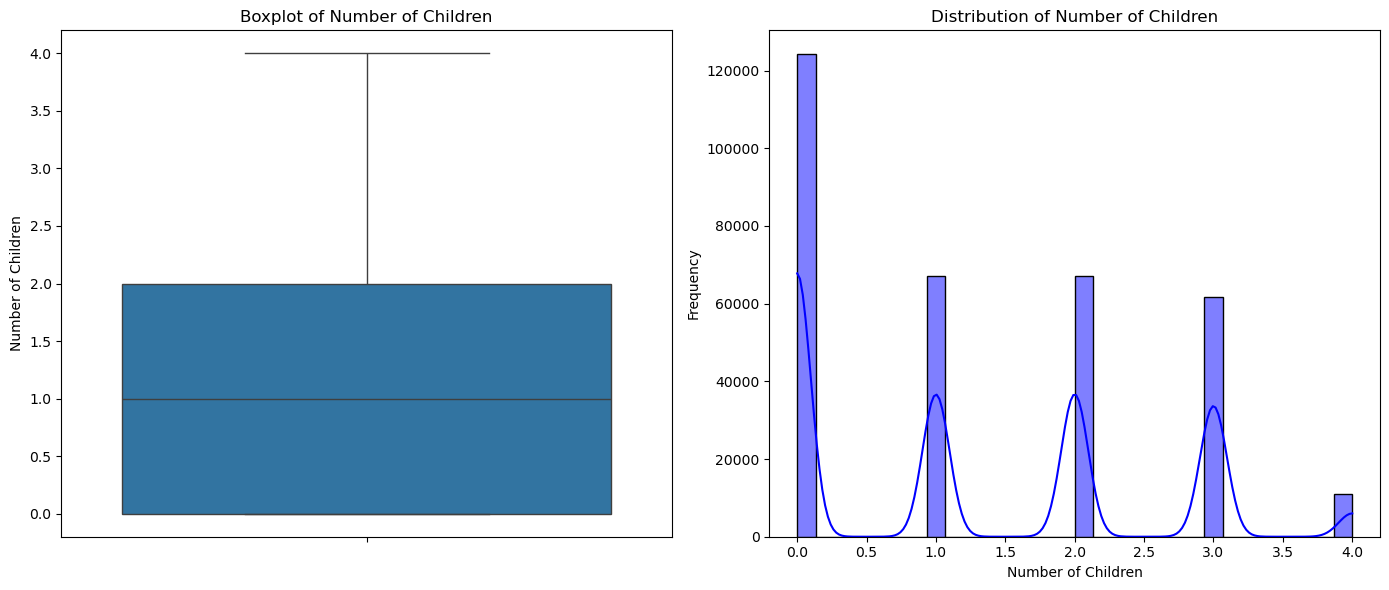

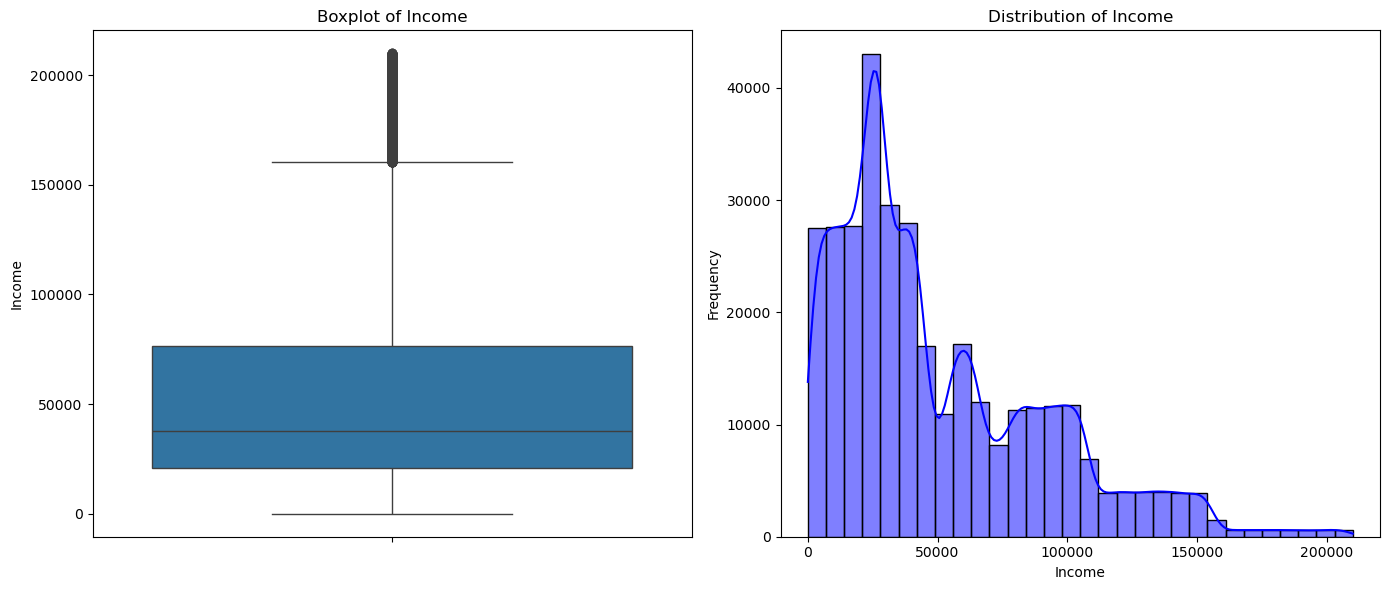

In [183]:
#Continuous columns investigation


# Create plots for each column
for col in continuous_cols:
    plt.figure(figsize=(14, 6))

    #Boxplot for outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    #Histogram for distribution
    plt.subplot(1, 2, 2)
    sns.histplot(X_train[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()

In [ ]:
#Data Manipulation
# from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
# scaler = StandardScaler()

# Apply the scaler to the 'A' column and create a new standardized column
# df['Income Standardised'] = scaler.fit_transform(df[['Income']])
# Apply log transformation (adding 1 to avoid log(0) error)
# X_train['Income Standardised'] = np.sqrt(X_train['Income'] + 1)
# df['Income Standardised'], _ = stats.boxcox(1/(df['Income'] + 1))
#test if normalised

# from scipy.stats import shapiro
# stat, p_value = shapiro(df['Income Standardised'])
# print(p_value)

# import scipy.stats as stats
# sns.histplot(df['Income Standardised'], kde=True, color='skyblue', stat='density', bins=30)
# plt.show()

# # Create a Q-Q plot
# plt.figure(figsize=(6, 6))
# stats.probplot(df['Income Standardised'], dist="norm", plot=plt)
# plt.title('Q-Q Plot for Normality')
# plt.show()

In [ ]:
#age fine as distribution, no children as categorical (potentially change to yes/no), 
#may need to transform income to normal dist for linear regression or deep learnign to improve convergence
#not to transform income for interpretability - choose model that is not sensitive eg tree based

In [229]:
#Correlation with target variable

# Combine features and target into a single DataFrame
X_train_corr_cont = X_train[continuous_cols]
X_train_corr_cont['target'] = y_train.map({'No': 0, 'Yes': 1})  # Append target variable

# Compute correlations
correlations = X_train_corr_cont.corr(method='pearson')['target'].sort_values(ascending=False)
print(correlations)




target                1.000000
Age                   0.023633
Number of Children    0.003191
Income               -0.136854
Name: target, dtype: float64


C:\Users\LewisDownward\AppData\Local\Temp\ipykernel_9756\636100423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_corr_cont['target'] = y_train.map({'No': 0, 'Yes': 1})  # Append target variable


In [243]:
#categorical correlation
# Encode the categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Ensure dense output
X_categorical_encoded = categorical_transformer.fit_transform(X_train[categorical_cols])

# Get column names for the encoded features
encoded_feature_names = categorical_transformer.get_feature_names_out(categorical_cols)

# Convert to DataFrame for easier handling
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

categorical_correlations = {}
for col in X_categorical_encoded_df.columns:
    corr, _ = pointbiserialr(X_categorical_encoded_df[col], y_train.map({'Yes': 1, 'No': 0}))
    categorical_correlations[col] = corr

categorical_correlations_df = pd.DataFrame(list(categorical_correlations.items()), columns=['Feature', 'Correlation'])

# Print the table
print(categorical_correlations_df)

                              Feature  Correlation
0             Marital Status_Divorced    -0.006504
1              Marital Status_Married     0.001930
2               Marital Status_Single    -0.006934
3              Marital Status_Widowed     0.009244
4    Education Level_Associate Degree     0.031107
5   Education Level_Bachelor's Degree    -0.037904
6         Education Level_High School     0.037323
7     Education Level_Master's Degree    -0.025439
8                 Education Level_PhD    -0.010505
9              Smoking Status_Current    -0.004055
10              Smoking Status_Former    -0.001619
11          Smoking Status_Non-smoker     0.004182
12     Physical Activity Level_Active    -0.007371
13   Physical Activity Level_Moderate    -0.001568
14  Physical Activity Level_Sedentary     0.007394
15         Employment Status_Employed    -0.140990
16       Employment Status_Unemployed     0.140990
17           Alcohol Consumption_High     0.013375
18            Alcohol Consumpti

In [24]:
#Correlation

# Example categorical data
# contingency_table = pd.crosstab(df['categorical_var1'], df['categorical_var2'])

# # Perform Chi-Square Test
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print(f"Chi-Square Statistic: {chi2}")
# print(f"P-Value: {p}")

# # Interpretation
# if p < 0.05:
#     print("The variables are significantly associated.")
# else:
#     print("No significant association between the variables.")


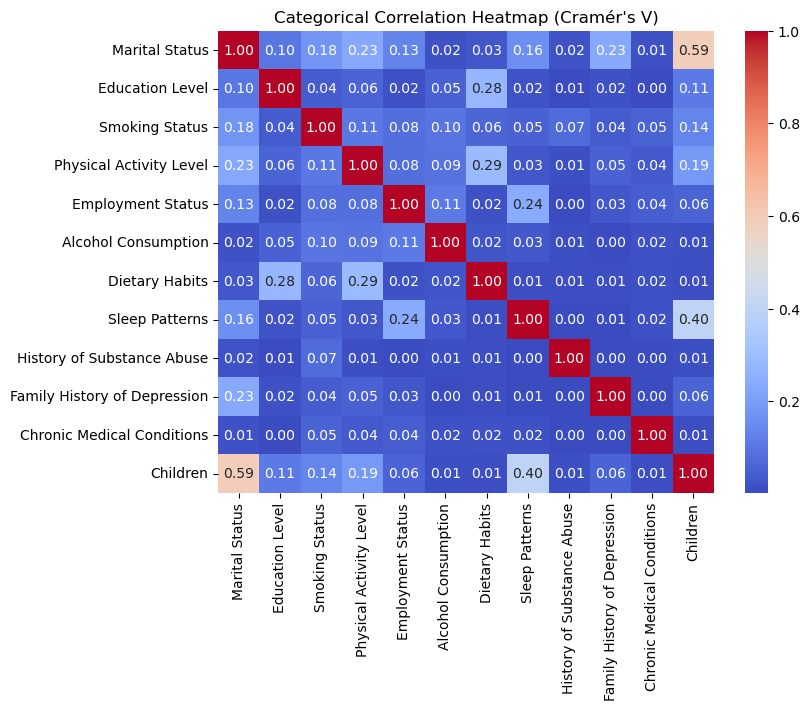

In [52]:
# Correlation for categorical variables

correlation_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for var1 in categorical_cols:
    for var2 in categorical_cols:
        contingency_table = pd.crosstab(X_train[var1], X_train[var2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        correlation_matrix.loc[var1, var2] = cramers_v

correlation_matrix = correlation_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Categorical Correlation Heatmap (Cramér's V)")
plt.show()


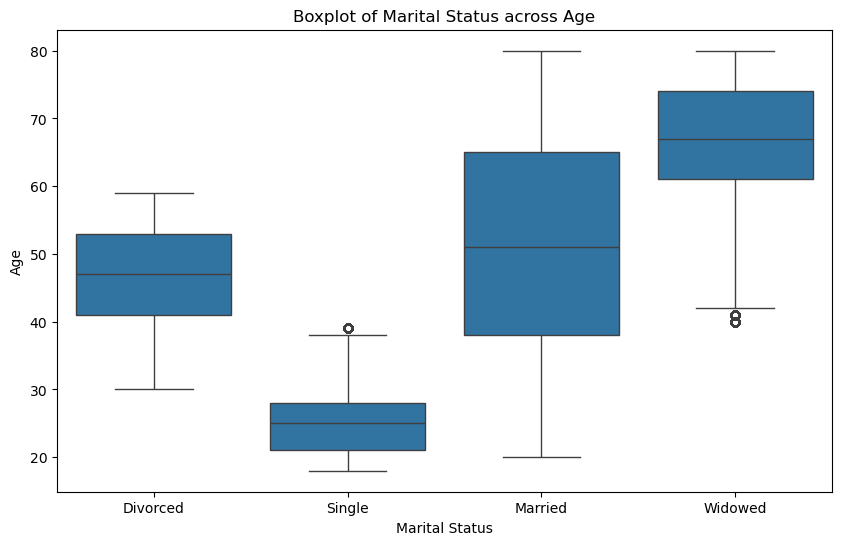

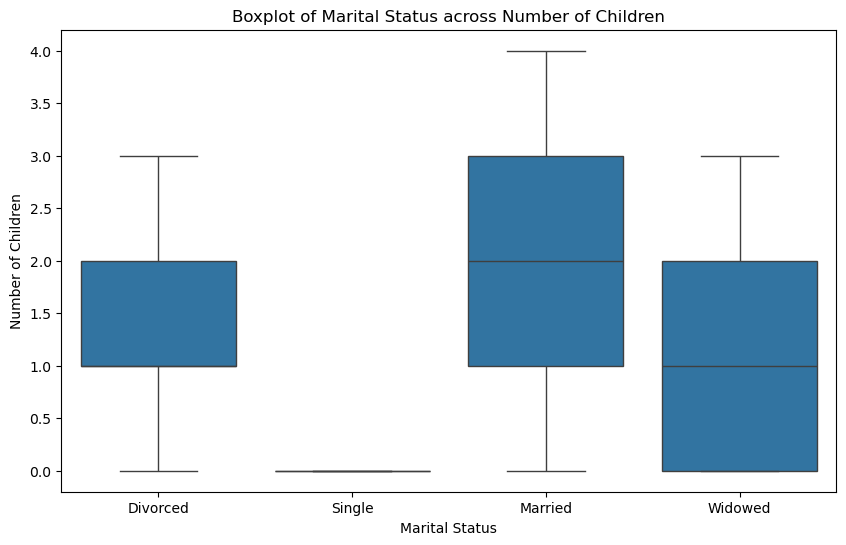

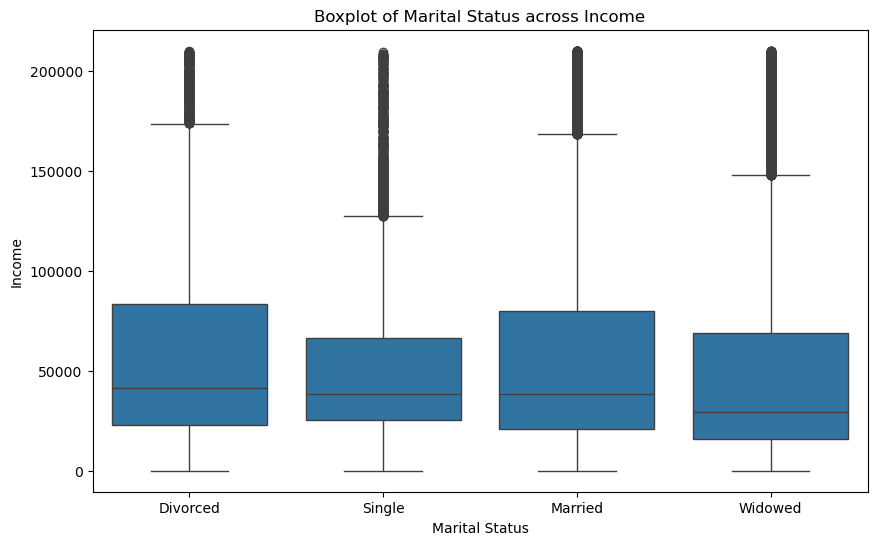

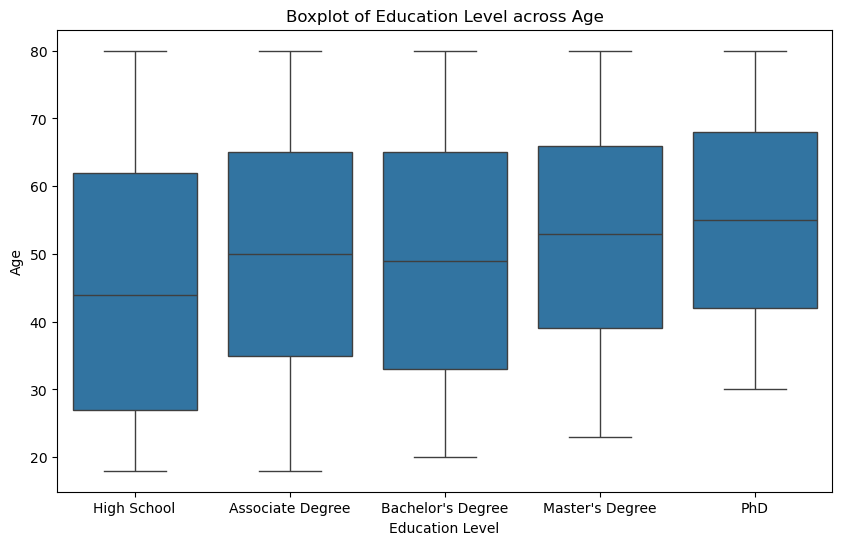

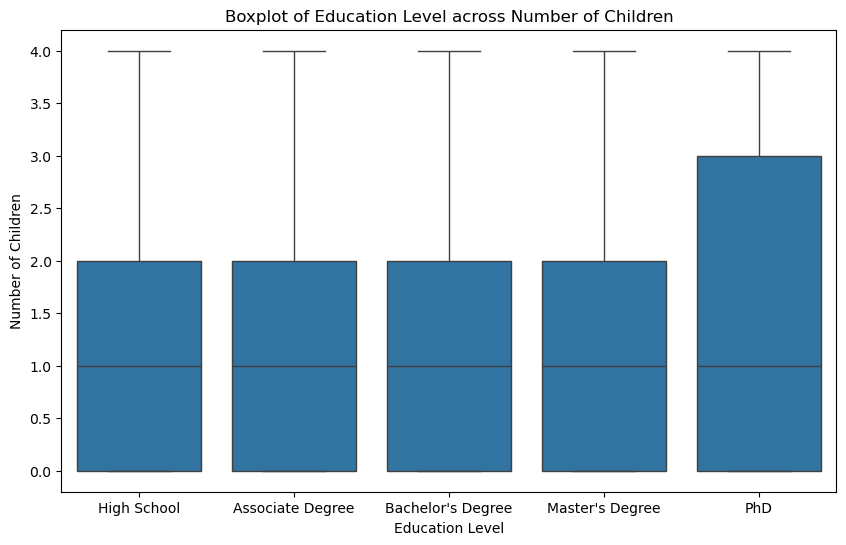

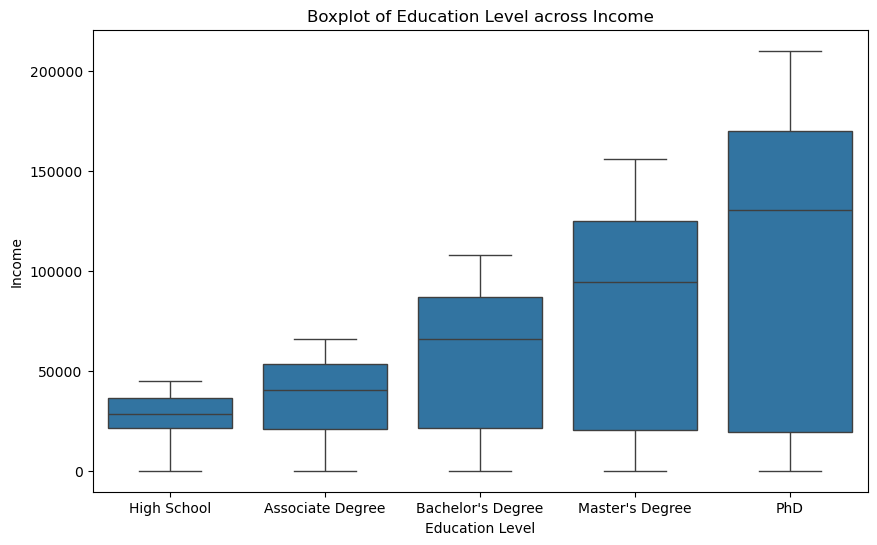

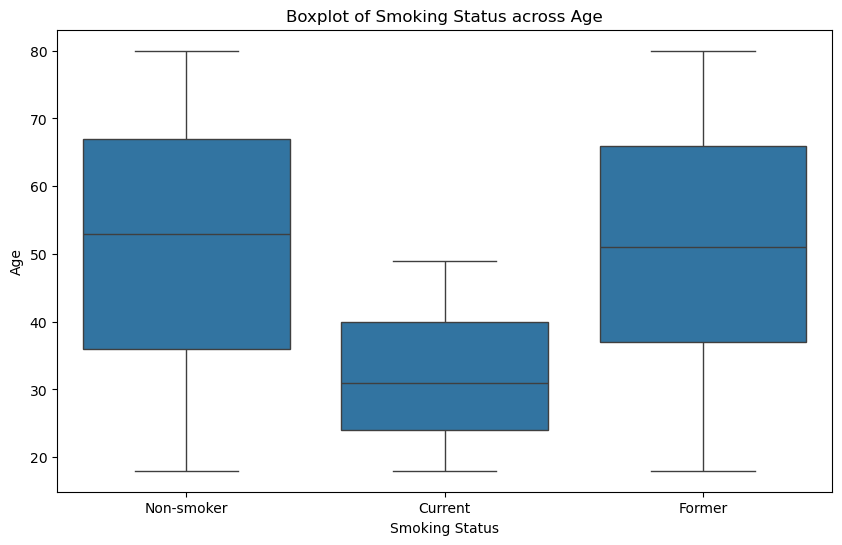

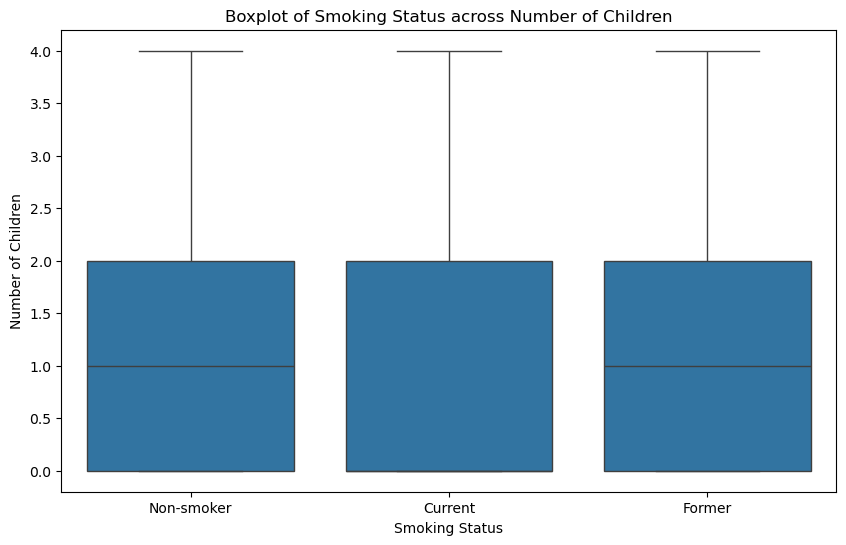

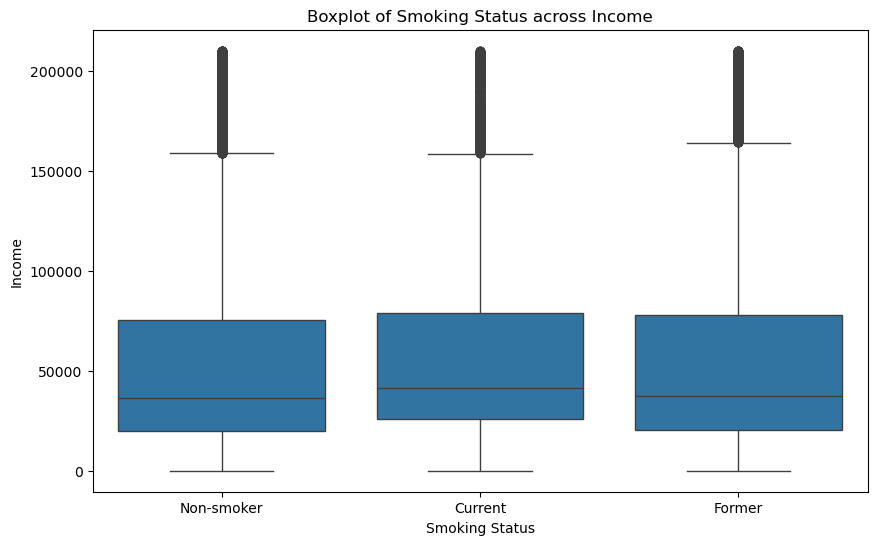

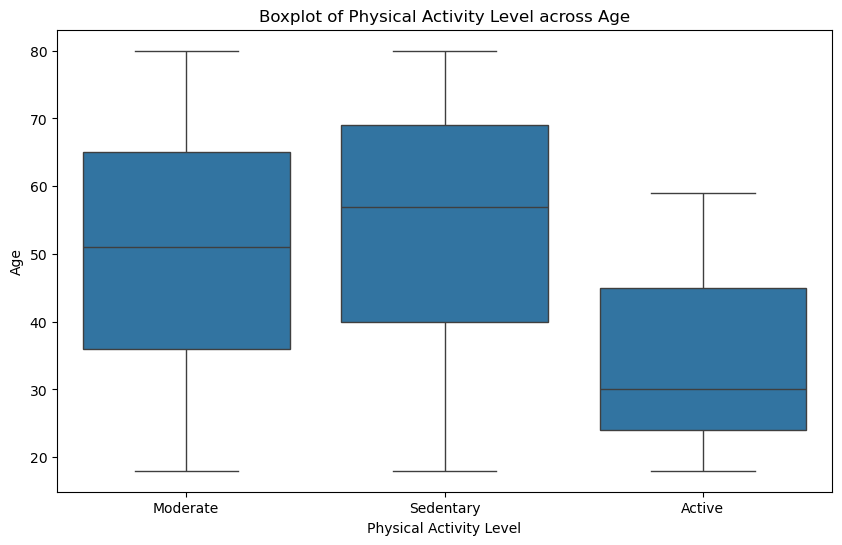

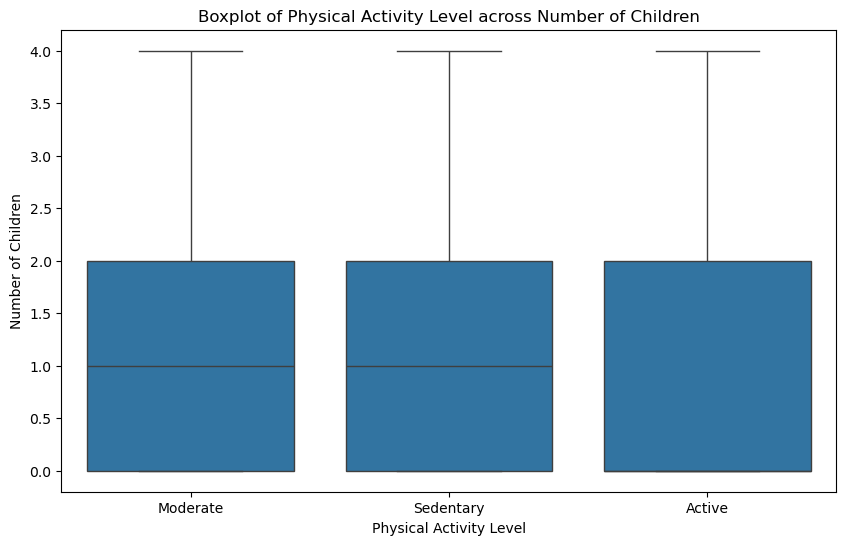

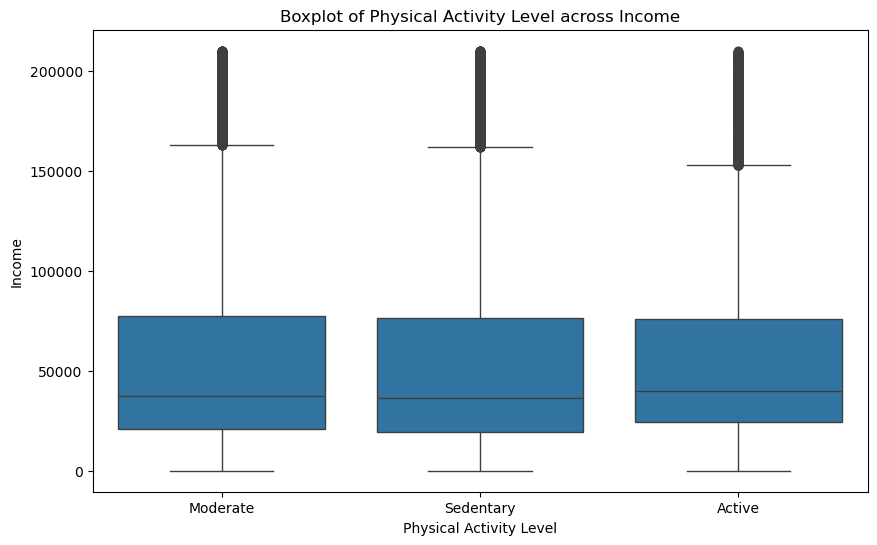

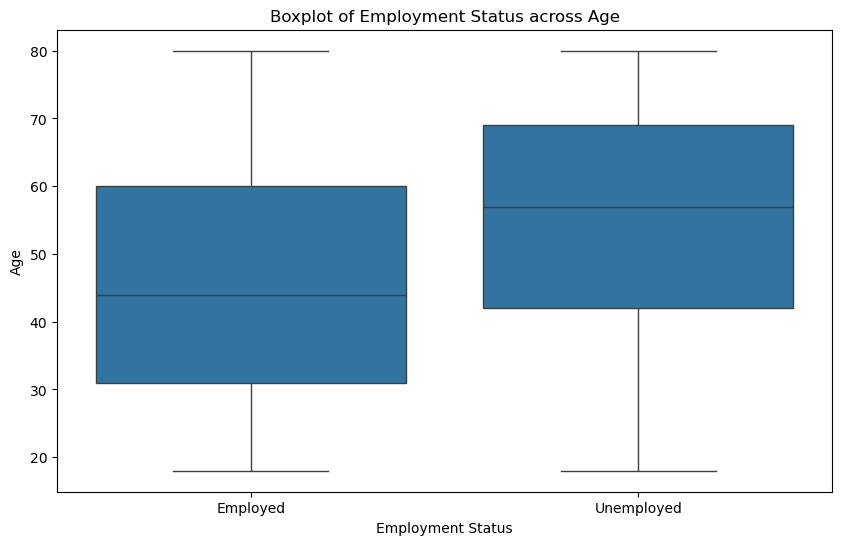

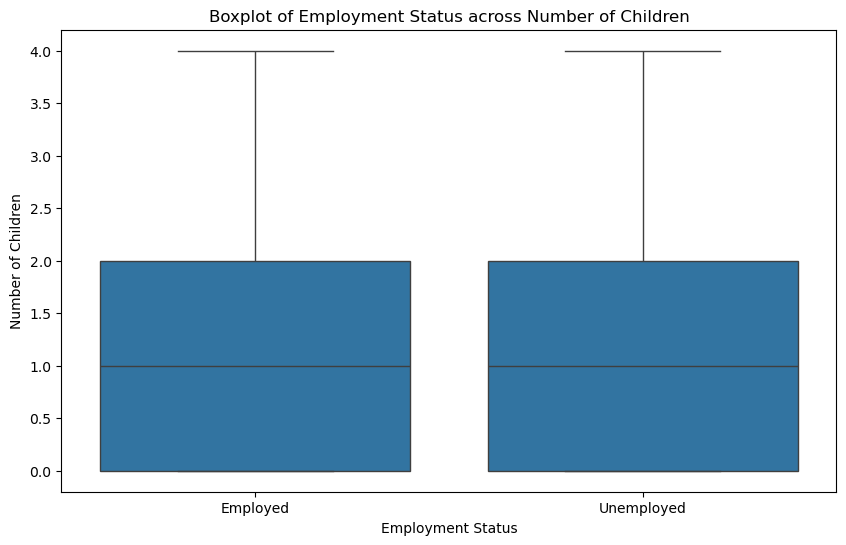

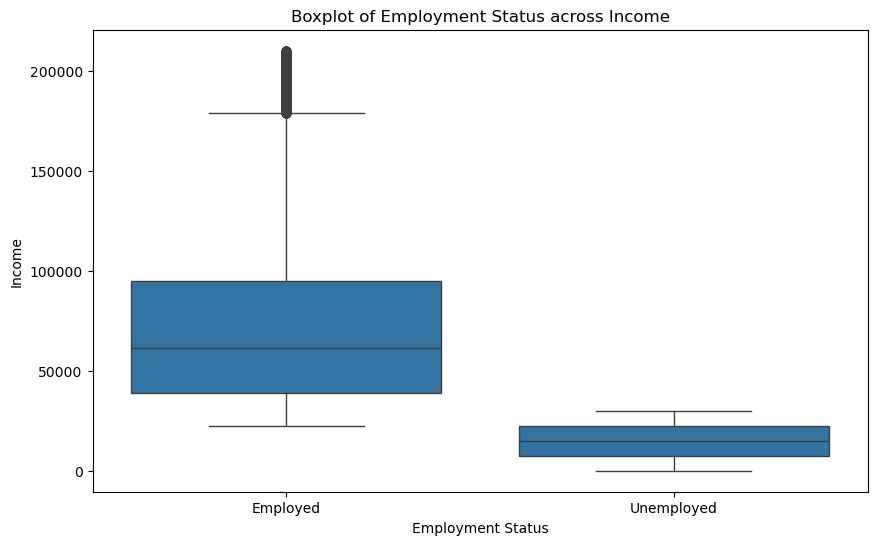

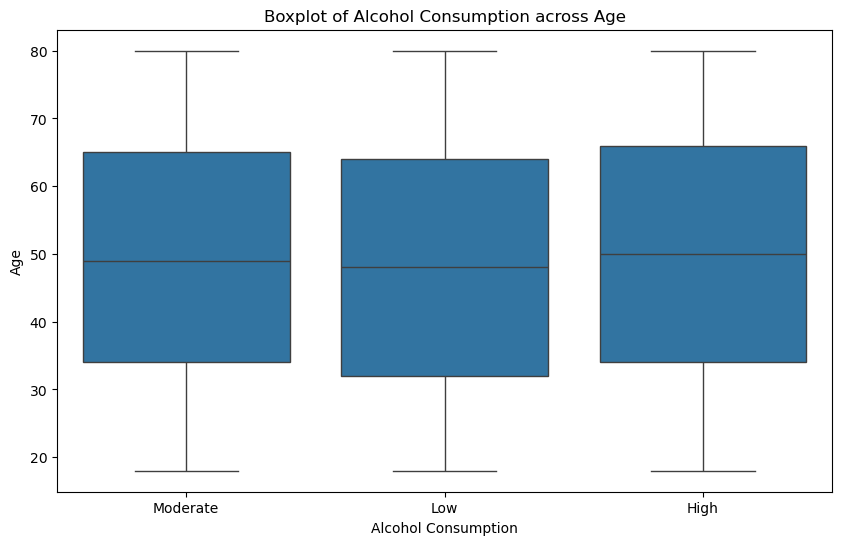

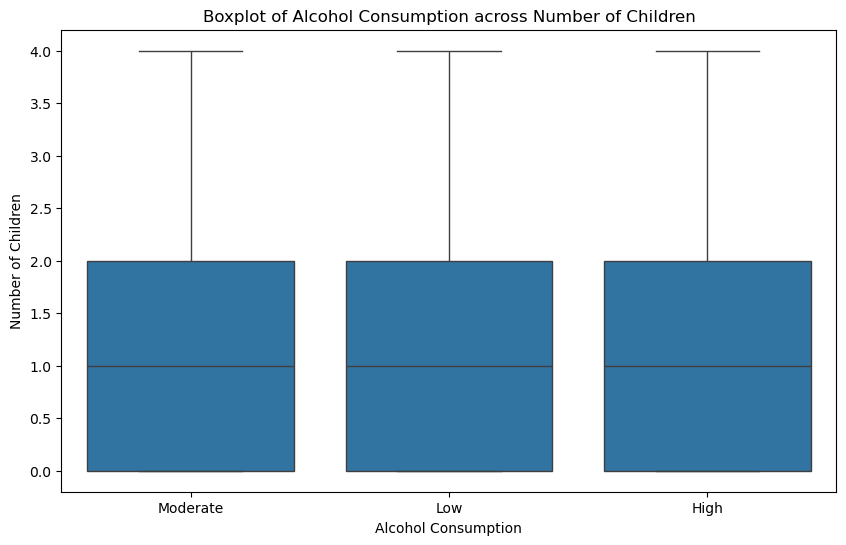

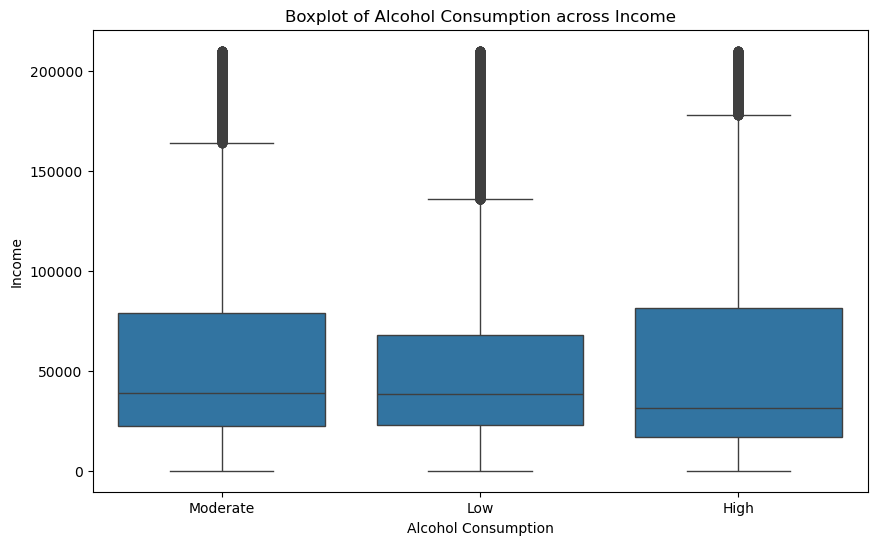

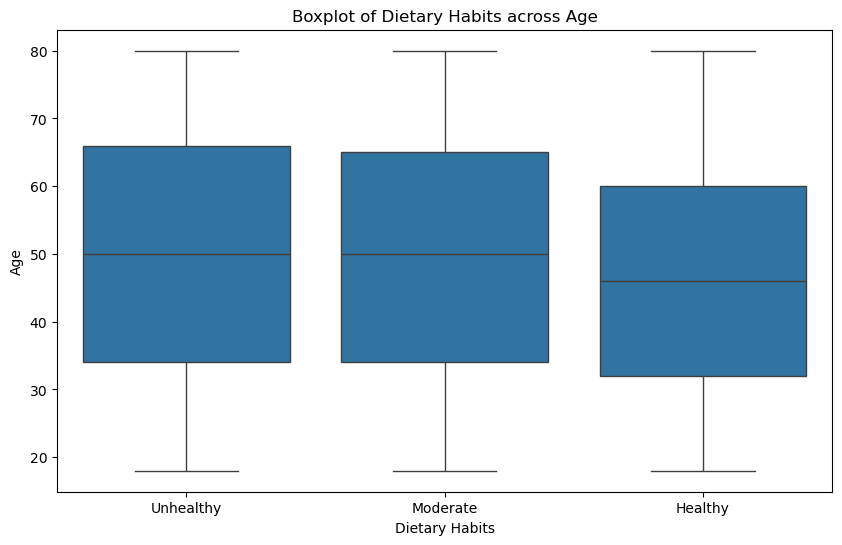

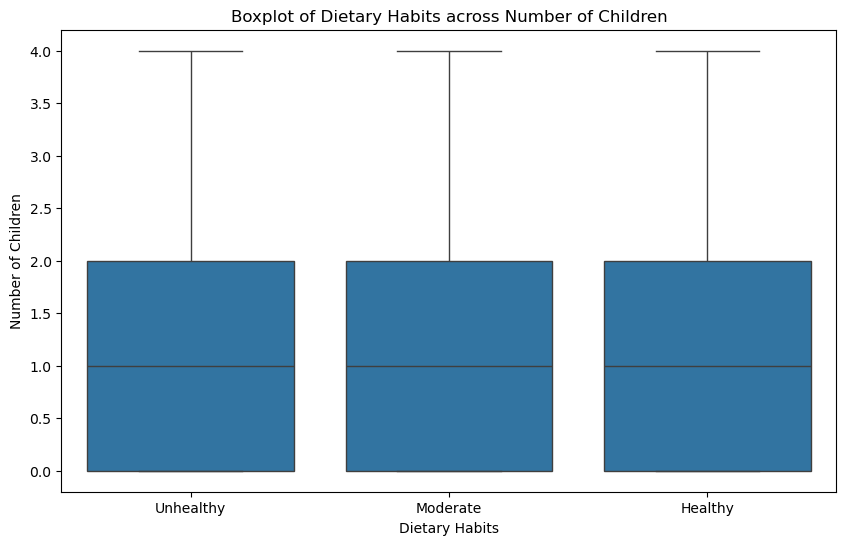

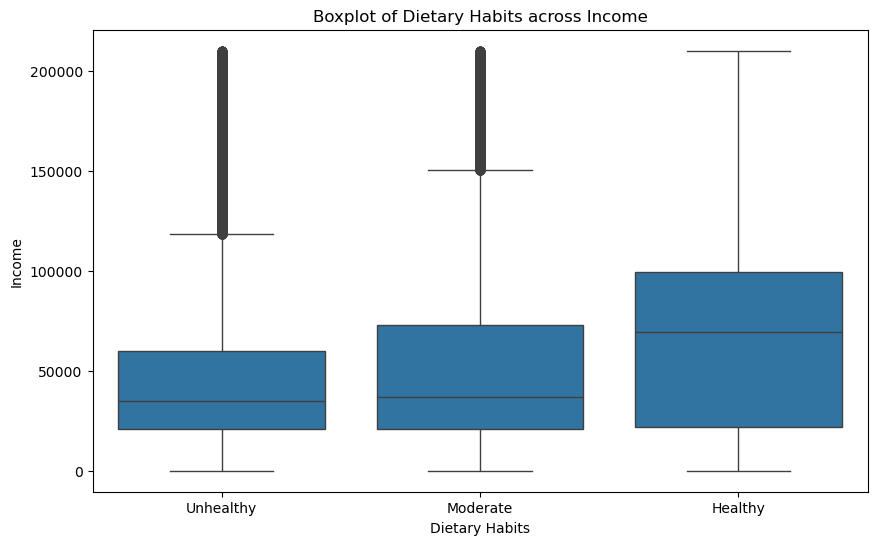

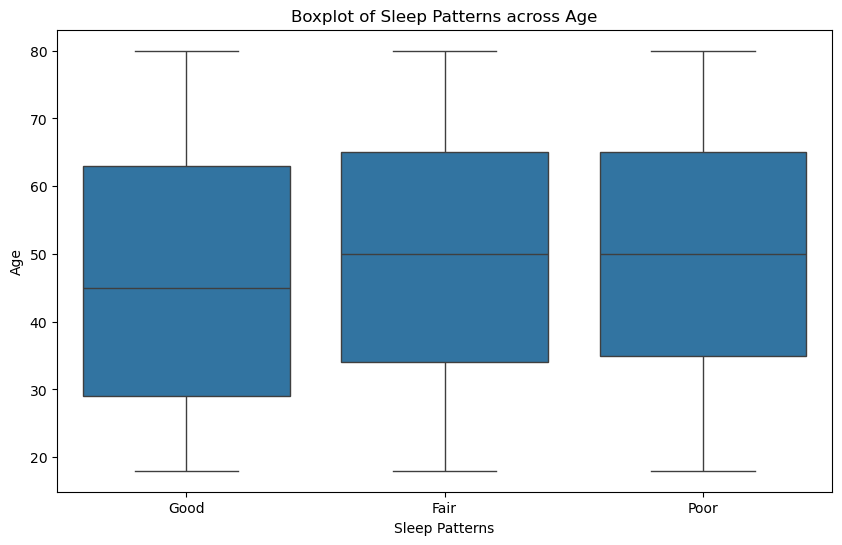

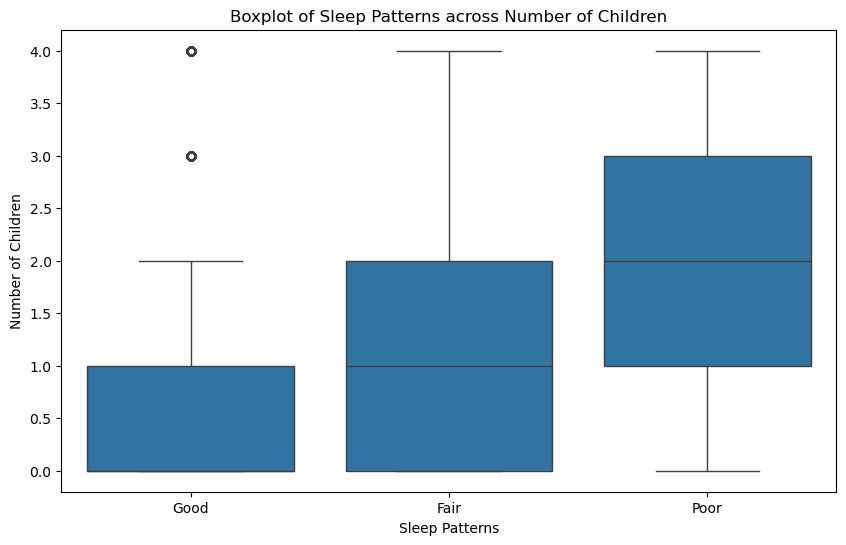

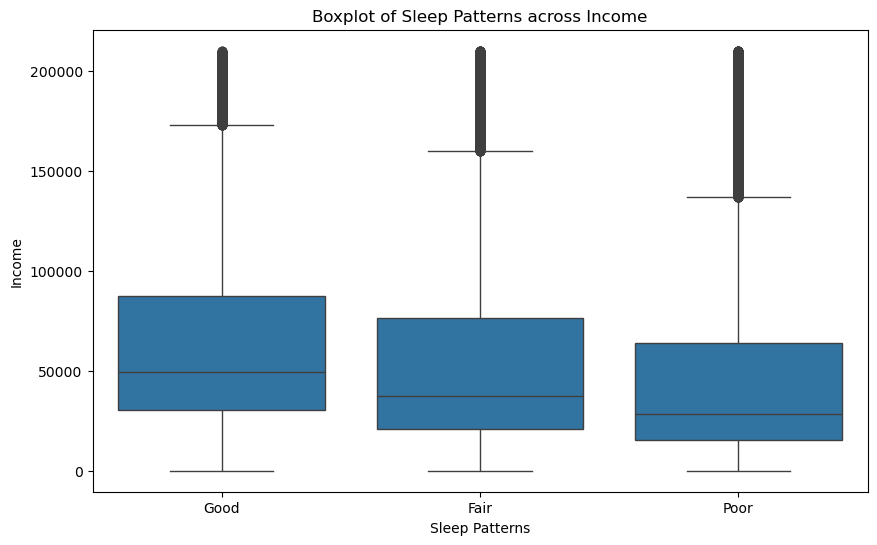

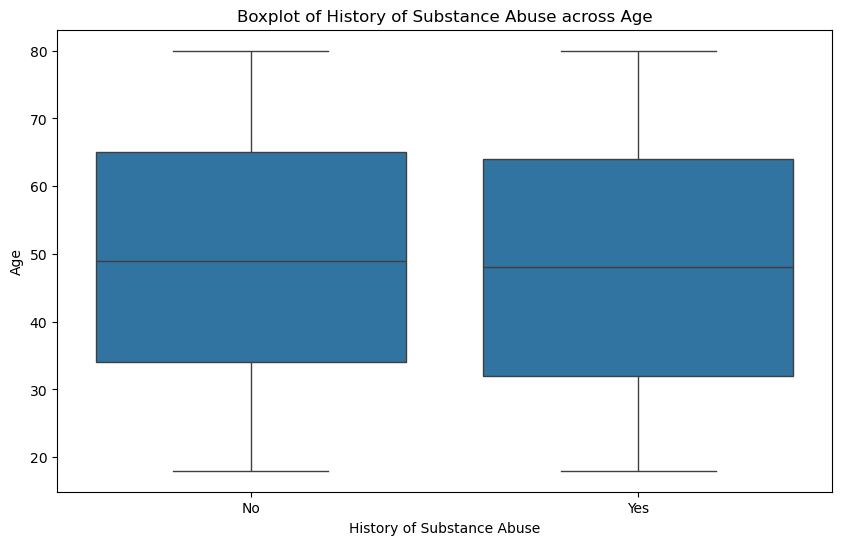

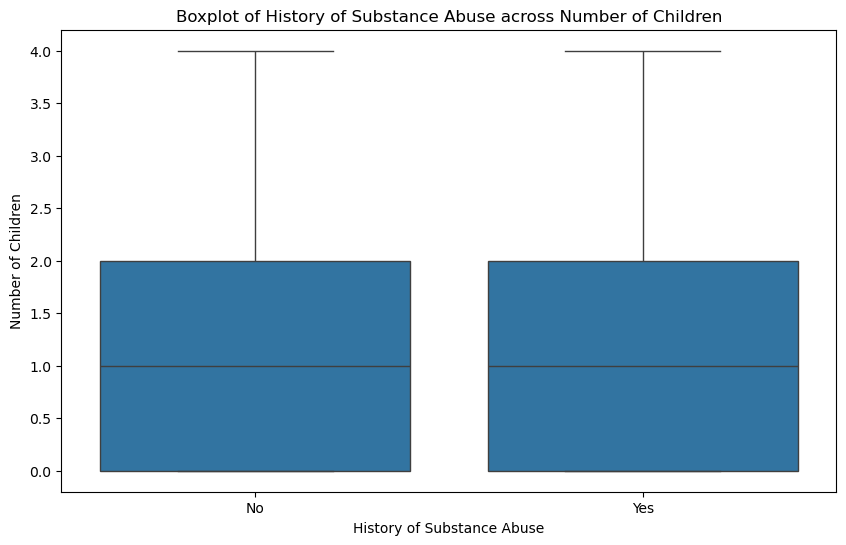

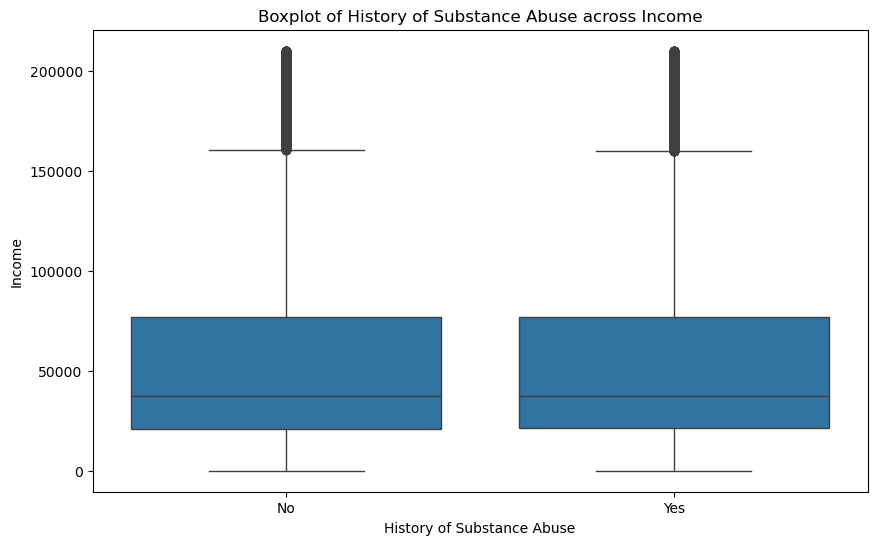

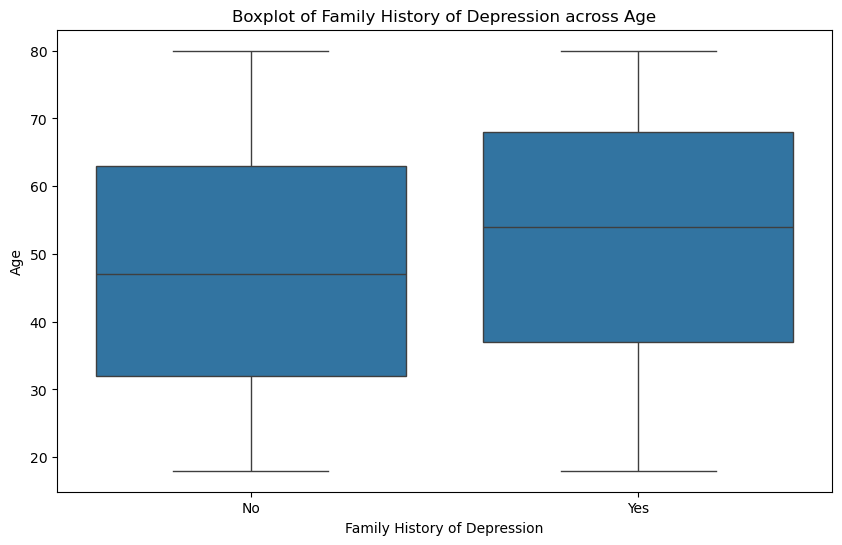

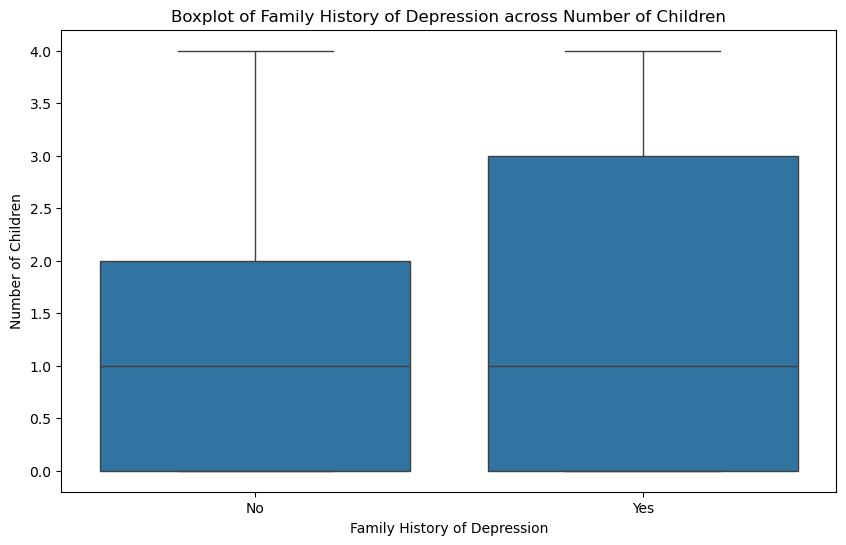

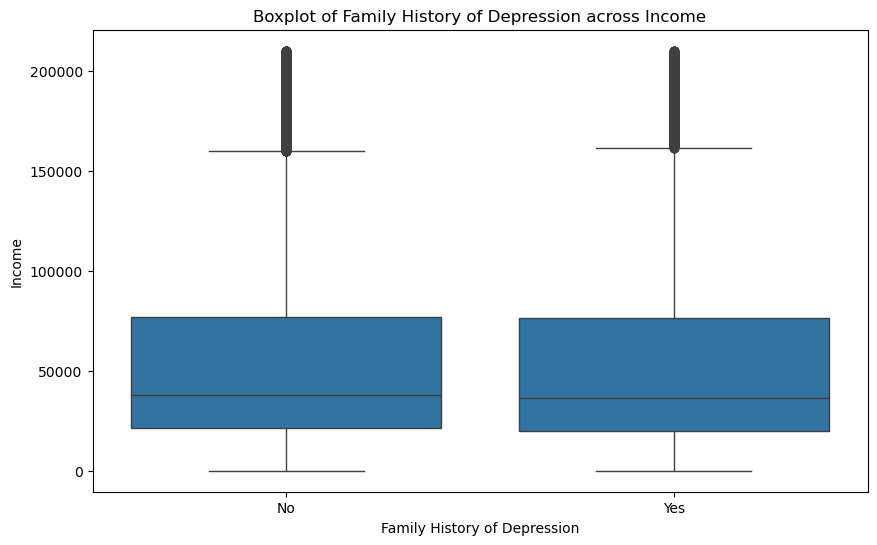

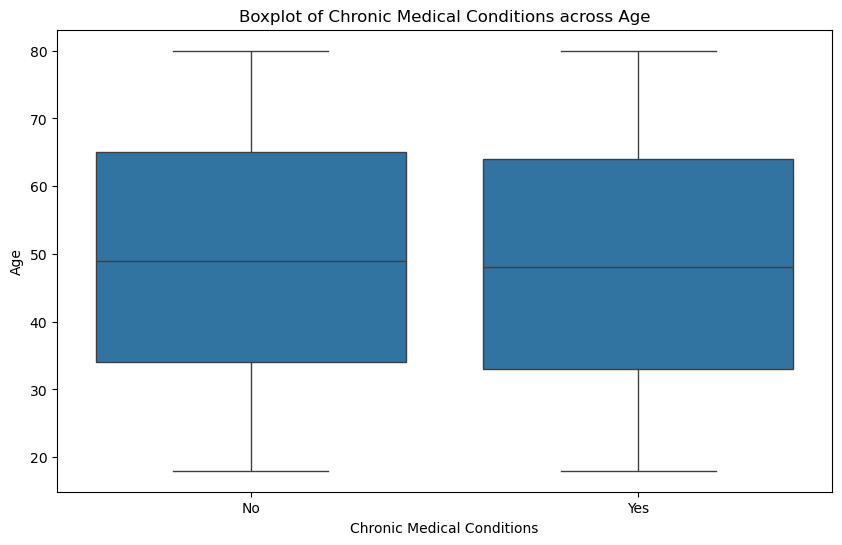

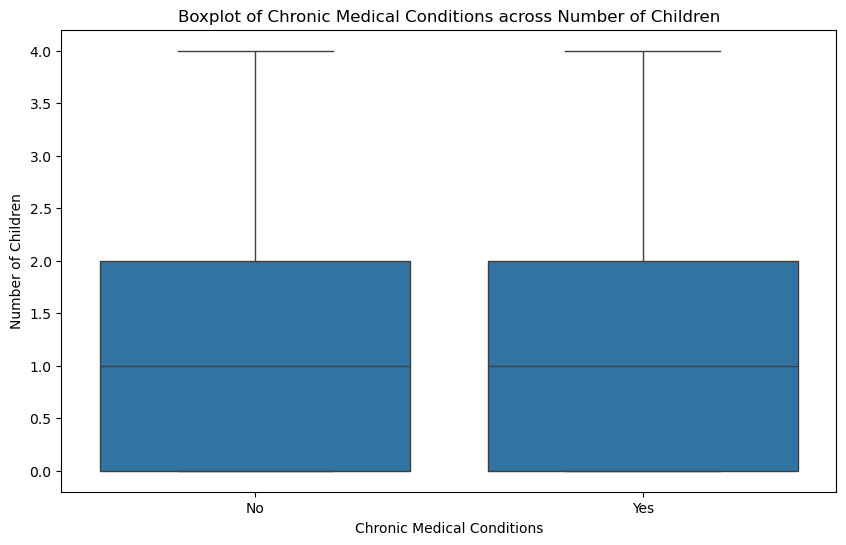

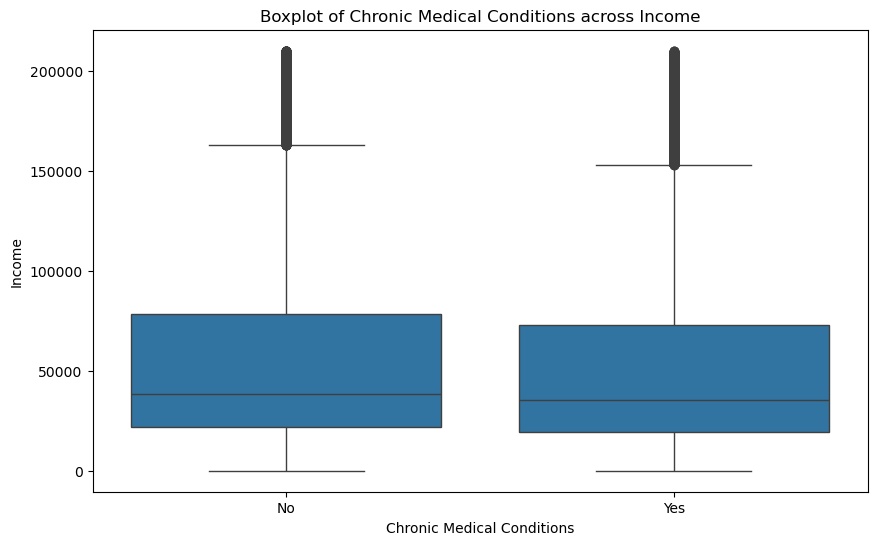

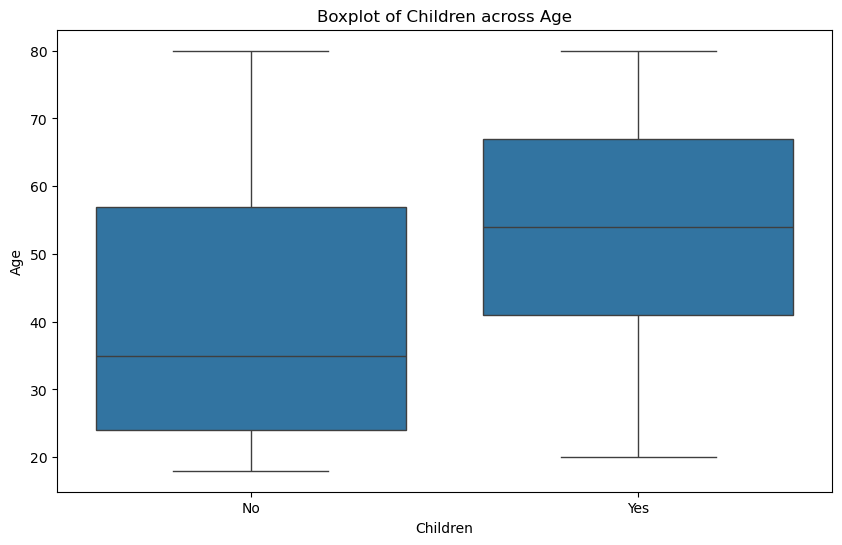

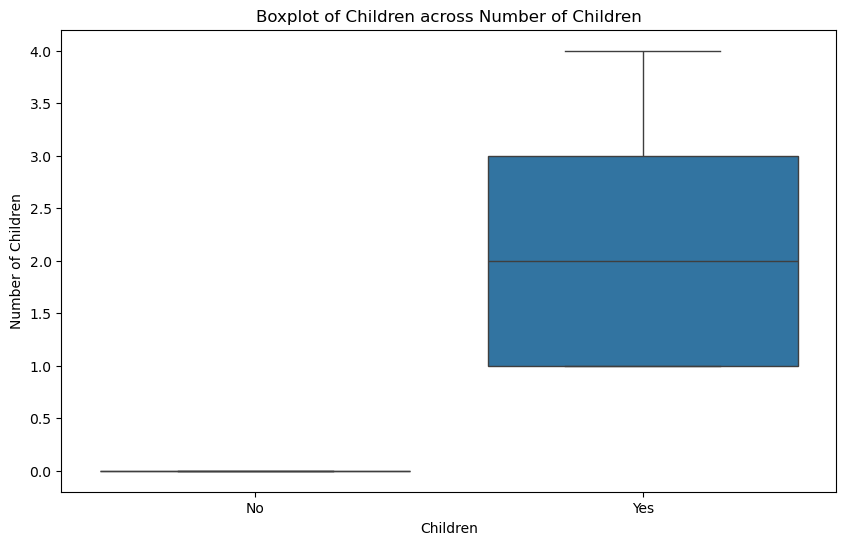

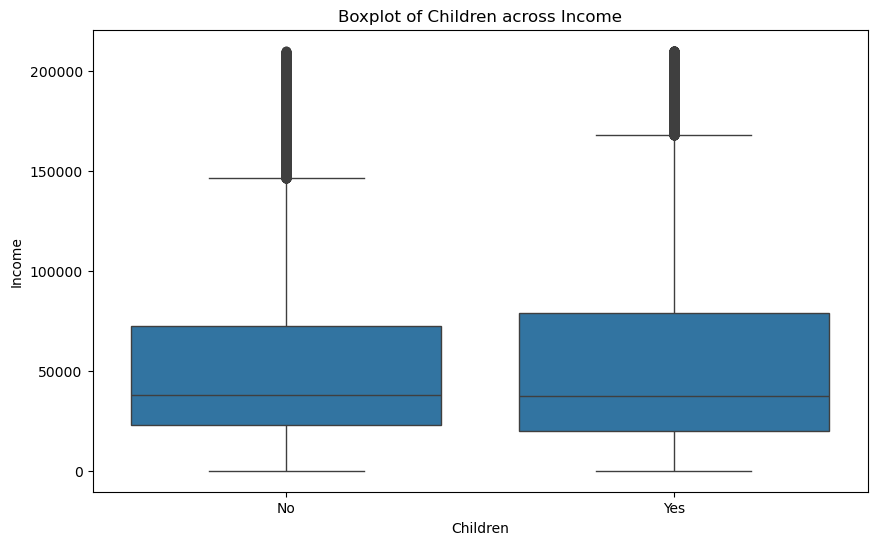

In [329]:
#correlation between categorical and continuous columns

for i in categorical_cols:
    for j in continuous_cols:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=i, y=j, data=X_train)
        plt.title('Boxplot of '+ i +' across '+j)
        plt.show()



# for i in categorical_cols:
#     grouped = X_train.groupby(i)
    
#     # Step 2: Perform the KW-test for each continuous column
#     kruskal_test_results = {}
#     for col in continuous_cols:
#         # Get values for the continuous column grouped by categorical variable
#         groups = [group[col].values for name, group in grouped]
        
#         # Perform Kruskal-Wallis test
#         h_stat, p_value = kruskal(*groups)
        
#         # Store the results
#         kruskal_test_results[col] = {'H-statistic': h_stat, 'P-value': p_value}
    
#     # Step 3: Print the results
#     kruskal_test_results = pd.DataFrame(f_test_results).T
#     print(i, f_test_results_df)


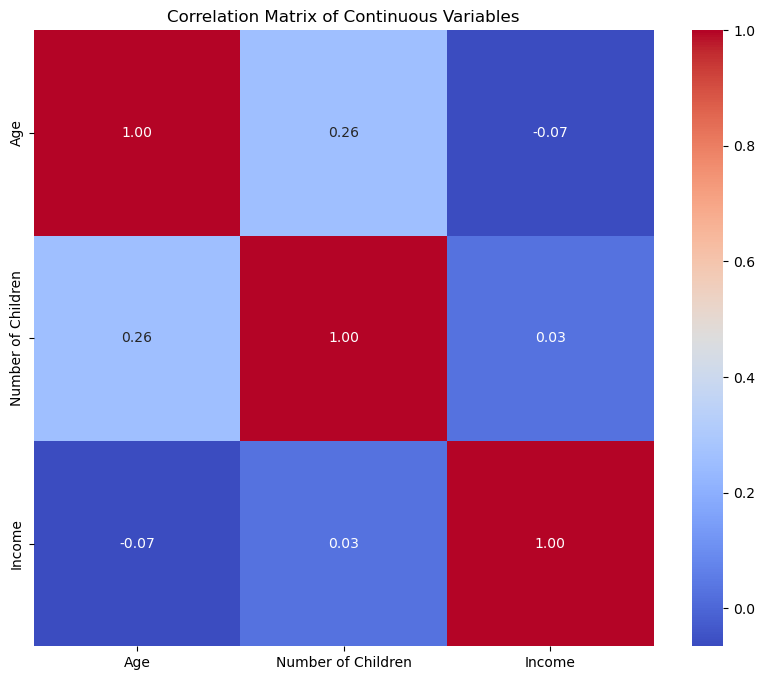

In [249]:
#Correlation between the continuous columns
continuous_correlations = X_train[continuous_cols].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(continuous_correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()


In [ ]:
#how may these affect the analyses

In [68]:
# Column encoding
# considering ordinal encoding - using one hot encoding for first pass 
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
continuous_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create the ColumnTransformer with OneHotEncoder
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
#     ],
#     remainder='passthrough'  # Leave non-categorical columns unchanged
# )


In [76]:
#Feature Selection

# Define the classifier for feature selection
feature_selector = RandomForestClassifier(random_state=42)  # Used for feature selection

# Create the feature selection pipeline
Feature_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

Feature_pipeline.fit(X_train, y_train)

# Access the feature selector
selected_features_mask = Feature_pipeline.named_steps['feature_selection'].get_support()
feature_names = Feature_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Print the selected features
selected_features = feature_names[selected_features_mask]
print("Selected Features:", selected_features)


Selected Features: ['num__Age' 'num__Number of Children' 'num__Income']


In [347]:
##Feature selection - refer to papers/publications

# Columns to include: 
# comorbidities (Smoking Status, 'Dietary Habits', 'Chronic Medical Conditions', 'Alcohol Consumption', 'History of Substance Abuse'), physical disability (physical activity level), age, children, 'Family History of Depression', Income

#not including 'Marital Status' - correlation with age and children.
            # "Education Level" -correlation with income
            # 'Employment Status' - correlation with income
            # 'Sleep Patterns' - correlation with children
            # children - using 'Number of Children' as from feature selection

inclusion=['Smoking Status', 'Dietary Habits', 'Chronic Medical Conditions', 'Alcohol Consumption', 'History of Substance Abuse', 'Physical Activity Level', 'Age', 'Number of Children', 'Family History of Depression', 'Income']
inclusion_cat=['Smoking Status', 'Dietary Habits', 'Chronic Medical Conditions', 'Alcohol Consumption', 'History of Substance Abuse', 'Physical Activity Level', 'Family History of Depression']
inclusion_con=[ 'Age', 'Number of Children', 'Income']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, inclusion_con),
        ('cat', categorical_transformer, inclusion_cat)
    ]
)


In [353]:
#RFC model fitting

# Create the pipeline
RFC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('smote', SMOTE(random_state=42)),     # Oversampling
    ('classifier', RandomForestClassifier(random_state=42))
])


# Hyperparameter grid
RFC_param_grid = {
    'classifier__n_estimators': [10, 20, 50, 100],
    'classifier__max_depth': [10, 20, 50],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
RFC_grid_search = GridSearchCV(
    RFC_pipeline,            # The pipeline
    RFC_param_grid,          # Hyperparameter space
    cv=5,                # 5-fold cross-validation
    scoring='roc_auc',   # Metric for evaluation
    n_jobs=-1            # Use all available cores
)

# Fit the grid search to the training data
RFC_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", RFC_grid_search.best_params_)

# Best score
print("Best ROC AUC Score:", RFC_grid_search.best_score_)

# Use the best model to predict
RFC_best_pipeline = RFC_grid_search.best_estimator_
RFC_y_pred = RFC_best_pipeline.predict(X_test)
RFC_y_pred_proba = RFC_best_pipeline.predict_proba(X_test)[:, 1]


y_test_mapped = y_test.map({'No': 0, 'Yes': 1})
RFC_y_pred_mapped = pd.Series(RFC_y_pred).map({'No': 0, 'Yes': 1})

# For classification
RFC_accuracy = accuracy_score(y_test_mapped, RFC_y_pred_mapped)
RFC_recall  = recall_score(y_test_mapped, RFC_y_pred_mapped)
RFC_f1 = f1_score(y_test_mapped, RFC_y_pred_mapped)
RFC_roc_auc = roc_auc_score(y_test_mapped, RFC_y_pred_proba)

print(f"Accuracy: {RFC_accuracy:.2f}, Recall: {RFC_recall:.2f}, F1 Score: {RFC_f1:.2f}, ROC AUC: {RFC_roc_auc:.2f}")



Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best ROC AUC Score: 0.5971650099313539
Accuracy: 0.54, F1 Score: 0.46, ROC AUC: 0.60


In [351]:
#Logistic Regression model fitting

logistic_model = LogisticRegression(
    penalty='l2',          # L2 regularization
    solver='liblinear',    # Solver for small-to-medium datasets
    random_state=42,
    max_iter=1000          # Increase max iterations for convergence
)

# Create the pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('smote', SMOTE(random_state=42)),     # Oversampling
    ('classifier', logistic_model)
])


# Hyperparameter grid
logistic_param_grid = {
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
logistic_grid_search = GridSearchCV(
    logistic_pipeline,            # The pipeline
    logistic_param_grid,          # Hyperparameter space
    cv=5,                # 5-fold cross-validation
    scoring='roc_auc',   # Metric for evaluation
    n_jobs=-1            # Use all available cores
)

# Fit the grid search to the training data
logistic_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", logistic_grid_search.best_params_)

# Best score
print("Best ROC AUC Score:", logistic_grid_search.best_score_)

# Use the best model to predict
logistic_best_pipeline = logistic_grid_search.best_estimator_
logistic_y_pred = logistic_best_pipeline.predict(X_test)
logistic_y_pred_proba = logistic_best_pipeline.predict_proba(X_test)[:, 1]


y_test_mapped = y_test.map({'No': 0, 'Yes': 1})
logistic_y_pred_mapped = pd.Series(logistic_y_pred).map({'No': 0, 'Yes': 1})

# For classification
logistic_accuracy = accuracy_score(y_test_mapped, logistic_y_pred_mapped)
logistic_recall = recall_score(y_test_mapped, logistic_y_pred_mapped)
logistic_f1 = f1_score(y_test_mapped, logistic_y_pred_mapped)
logistic_roc_auc = roc_auc_score(y_test_mapped, logistic_y_pred_proba)

print(f"Accuracy: {logistic_accuracy:.2f},Recall: {logistic_recall:.2f}, F1 Score: {logistic_f1:.2f}, ROC AUC: {logistic_roc_auc:.2f}")



Best Parameters: {'classifier__C': 0.0001, 'classifier__solver': 'lbfgs'}
Best ROC AUC Score: 0.5930391190315536
Accuracy: 0.53, F1 Score: 0.47, ROC AUC: 0.59


In [357]:
#Deep learning

#Preprocessing

# Preprocess the data - train validation test
X_train_preprocessed = preprocessor.fit_transform(X_train_noval)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

y_train_mapped = y_train_noval.map({'No': 0, 'Yes': 1})
y_val_mapped = y_val.map({'No': 0, 'Yes': 1})
y_test_mapped = y_test.map({'No': 0, 'Yes': 1})



# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train_mapped)


# Define the model
NN_model = Sequential([
    Input(shape=(X_train_resampled.shape[1],)),  # Define input shape here
    Dense(128, activation='relu'), 
    Dropout(0.3), 
    Dense(64, activation='relu'),
    Dropout(0.2), 
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


NN_model.compile(
    optimizer='adam',  # Optimizer
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']  # Performance metric
)





In [365]:
#Fit the model
NN_history = NN_model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val_preprocessed, y_val_mapped),#validation datasets
    epochs=50,  # Number of epochs #50 for future runs
    batch_size=32,  # Batch size
    verbose=1
)

Epoch 1/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5745 - loss: 0.6779 - val_accuracy: 0.5352 - val_loss: 0.6840
Epoch 2/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5755 - loss: 0.6775 - val_accuracy: 0.5593 - val_loss: 0.6674
Epoch 3/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5772 - loss: 0.6772 - val_accuracy: 0.5430 - val_loss: 0.6845
Epoch 4/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5754 - loss: 0.6772 - val_accuracy: 0.5297 - val_loss: 0.6698
Epoch 5/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5754 - loss: 0.6775 - val_accuracy: 0.5432 - val_loss: 0.6727
Epoch 6/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5750 - loss: 0.6777 - val_accuracy: 0.5476 - val_loss: 0.6793
Epoch 7/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5759 - loss: 0.6769 - val_accuracy: 0.5268 - val_loss: 0.6740
Epoch 8/50
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 

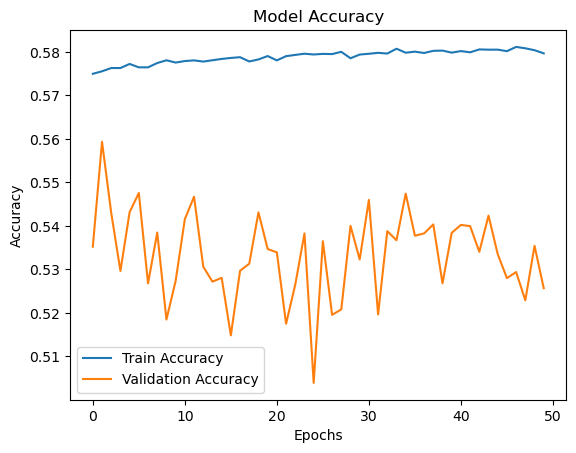

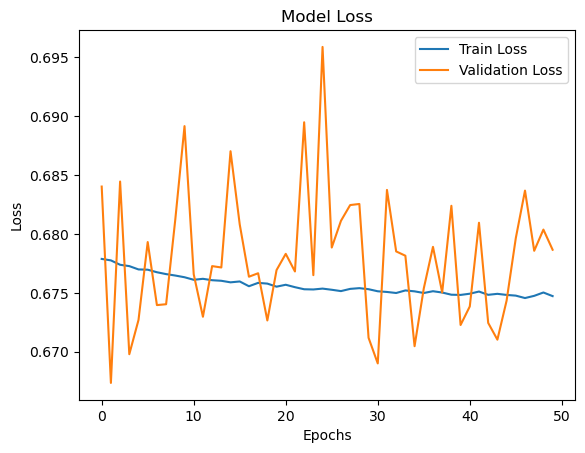

In [387]:
#Monitor training
# Accuracy plot
plt.plot(NN_history.history['accuracy'], label='Train Accuracy')
plt.plot(NN_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(NN_history.history['loss'], label='Train Loss')
plt.plot(NN_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [377]:
#Metrics
# Predict probabilities
NN_y_pred_proba = NN_model.predict(X_test_preprocessed)

# Convert probabilities to binary predictions
NN_y_pred = (NN_y_pred_proba > 0.5).astype(int)


y_test_mapped = y_test.map({'No': 0, 'Yes': 1})
# NN_y_pred_mapped = pd.Series(NN_y_pred).map({'No': 0, 'Yes': 1})

# For classification
NN_accuracy = accuracy_score(y_test_mapped, NN_y_pred)
NN_recall = recall_score(y_test_mapped, NN_y_pred)
NN_f1 = f1_score(y_test_mapped, NN_y_pred)
NN_roc_auc = roc_auc_score(y_test_mapped, NN_y_pred_proba)

print(f"Accuracy: {NN_accuracy:.2f}, Recall: {NN_recall:.2f}, F1 Score: {NN_f1:.2f}, ROC AUC: {NN_roc_auc:.2f}")


2587/2587 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step
Accuracy: 0.52, Recall: 0.68, F1 Score: 0.47, ROC AUC: 0.59


In [ ]:
##Biases
#we are predicting the history of mental health, not future mental health - correlation is not causation
#to adapt this will need to follow up patients over time and use survival analysis techniques
# Imbalanced target variable - adjusted with SMOTE to mitigate this

In [ ]:
##Limitations

# could pull out sex as a feature using the names of patients

# have not tested interactions for logistic regression due to lack of time
#have not tested NN hyper parameters due to lack of time
#would investigate individual factors effects in the logistic model with more time
#cannot do this with the other black box methods
#further investigation into variable correlations - t test etc. usuing mostly visual correlations


#majority of investigations use logistic regression for interpretability of factors, also sample sizes are generally small
#factors used include comorbidities, physical disability, gender, age, family history

#Majority of people will experience mental health issues in lifetime, factors of importance include personality style and lack of family history of disorde
#childhood socioeconomic privilege, superior health, or high intelligence not considered factors
# Schaefer, J. D., Caspi, A., Belsky, D. W., Harrington, H., Houts, R., Horwood, L. J., Hussong, A., Ramrakha, S., Poulton, R., & Moffitt, T. E. (2017). Enduring mental health: Prevalence and prediction. Journal of Abnormal Psychology, 126(2), 212–224. https://doi.org/10.1037/abn0000232


